In [4]:
import matplotlib.pyplot as plt
from util import *
from partition import *
from group_testing import *
from origami_assays import *
from epidemics import *
from networkx.generators.community import gaussian_random_partition_graph
import time

In [7]:
#TODO: Set these paths
data_folder = ""
figures_folder = ""

In [2]:
n_vertices = [50, 100, 200, 400, 800]

gamma = .1   #Recovery rate
tau = .1   #Transmission rate
num_init = 1
trials = 10000

perc_infecs = np.array([.02, .04, .08, .16, .32])
sizes = np.arange(2,15)
max_group_size = 64

group_approaches = ['Top-KL', 'Samp-KL']

In [6]:
run_times = np.zeros((len(group_approaches), len(n_vertices)))

for n in range(len(n_vertices)):
    print("size = ", n_vertices[n])
    
    n_vert = n_vertices[n]
    n_edges = n_vert * 5
    
    G = nx.gnm_random_graph(n_vert, n_edges)
    infec_matrix = sample_epidemics(G, tau, gamma, trials, 0.04, num_init, weight=None)
    
    start_time = time.time()
    
    i = 0
    #Kernighan-Lin topology
    if 'Top-KL' in group_approaches:        
        best_mean = 100 * G.number_of_nodes()
        
        size = 10
        top_kl =  topol_kernighan_lin(G, size, weight=None, n_iter=1)
        res = evaluate_two_level_group_testing(infec_matrix, top_kl)
            
        run_times[i][n] = time.time() - start_time
        
        i = i + 1
 
    start_time = time.time()

    samp_infec_matrix = sample_epidemics(G, tau, gamma, n_edges, 0.04, num_init, weight=None)
        
    #Kernighan-Lin sampling
    if 'Samp-KL' in group_approaches:
        samp_kl = samp_kernighan_lin(G, max_group_size, samp_infec_matrix, n_iter=1)
        res = evaluate_two_level_group_testing(infec_matrix, samp_kl)
        
        run_times[i][n] = time.time() - start_time
        
        i = i + 1
        
    

size =  50
size =  100
size =  200
size =  400
size =  800


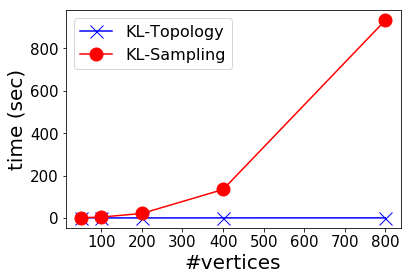

In [8]:
plt.figure()

width = .2

plt.plot(n_vertices, run_times[0], color='blue', label='KL-Topology', marker='x', markersize=13)
plt.plot(n_vertices, run_times[1], color='red', label='KL-Sampling', marker='o', markersize=13)

plt.ylabel("time (sec)", fontsize=20)
plt.xlabel("#vertices", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=16, ncol=1)

plt.savefig(figures_folder+"run_time.pdf", bbox_inches='tight')